In [24]:
# Exemplo de como usar  graphviz
import pandas
from graphviz import Digraph
import datetime
import pm4py

### Importa o arquivo csv pelo pandas

In [52]:
#'sep' define que tipo de separação o arquivo tem, geralmente tem ',' como default event_log agora é uma 'tabela'
event_log = pm4py.format_dataframe(pandas.read_csv("C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\running-example_3.csv", sep=';'), case_id='case_id', activity_key='activity', timestamp_key='timestamp')
event_log

,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1,register request,2010-12-30 10:02:00+00:00,50,Pete,1,register request,2010-12-30 10:02:00+00:00,0,0
1,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,1,examine thoroughly,2010-12-31 09:06:00+00:00,1,0
2,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,1,check ticket,2011-01-05 14:12:00+00:00,2,0
3,1,decide,2011-01-06 10:18:00+00:00,200,Sara,1,decide,2011-01-06 10:18:00+00:00,3,0
4,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,1,reject request,2011-01-07 13:24:00+00:00,4,0
5,2,register request,2010-12-30 10:32:00+00:00,50,Mike,2,register request,2010-12-30 10:32:00+00:00,5,1
6,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,2,check ticket,2010-12-30 11:12:00+00:00,6,1
7,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,2,examine casually,2010-12-30 13:16:00+00:00,7,1
8,2,decide,2011-01-05 10:22:00+00:00,200,Sara,2,decide,2011-01-05 10:22:00+00:00,8,1
9,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,2,pay compensation,2011-01-08 11:05:00+00:00,9,1


### Filtra exibe o numero de casos e o número de eventos

In [51]:
num_cases = len(event_log.case_id.unique())
num_events = len(event_log)
print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

Number of events: 42
Number of cases: 6


### Organiza a lista em ordem de eventos pelo tempo

In [31]:
total_cases = event_log.case_id
clients = sorted(event_log.timestamp)
listaOrganizada = list(zip(total_cases, clients))
print("Lista de eventos organizado pot tempo:\n {}".format(listaOrganizada))

Lista de eventos organizado pot tempo:
 [(3, '2010-12-30 11:02:00+01:00'), (3, '2010-12-30 11:32:00+01:00'), (3, '2010-12-30 12:12:00+01:00'), (3, '2010-12-30 14:16:00+01:00'), (3, '2010-12-30 14:32:00+01:00'), (3, '2010-12-30 15:06:00+01:00'), (3, '2010-12-30 16:34:00+01:00'), (3, '2010-12-31 10:06:00+01:00'), (3, '2011-01-05 11:22:00+01:00'), (2, '2011-01-05 15:12:00+01:00'), (2, '2011-01-06 09:02:00+01:00'), (2, '2011-01-06 09:18:00+01:00'), (2, '2011-01-06 11:18:00+01:00'), (2, '2011-01-06 12:18:00+01:00'), (1, '2011-01-06 13:06:00+01:00'), (1, '2011-01-06 15:02:00+01:00'), (1, '2011-01-06 15:02:00+01:00'), (1, '2011-01-06 16:06:00+01:00'), (1, '2011-01-07 10:16:00+01:00'), (6, '2011-01-07 12:06:00+01:00'), (6, '2011-01-07 14:24:00+01:00'), (6, '2011-01-07 16:22:00+01:00'), (6, '2011-01-07 16:52:00+01:00'), (6, '2011-01-08 11:22:00+01:00'), (5, '2011-01-08 11:43:00+01:00'), (5, '2011-01-08 12:05:00+01:00'), (5, '2011-01-08 14:43:00+01:00'), (5, '2011-01-09 09:55:00+01:00'), (5, '20

In [50]:
end_activities = pm4py.get_end_activities(event_log, activity_key='pay compensation')
end_activities

Exception: the specified activity column is not contained in the dataframe. Available columns: ['@@case_index', '@@index', 'activity', 'case:concept:name', 'case_id', 'concept:name', 'costs', 'resource', 'time:timestamp', 'timestamp']

In [37]:
# import pandas as pd
# import graphviz as gv
# from graphviz import Digraph
# from datetime import datetime
# import pm4py
# import os

# def import_csv(file_path):
#     event_log = pd.read_csv(file_path, sep=';')
#     event_log['timestamp'] = pd.to_datetime(event_log['timestamp'])

#     grafo = Digraph()
    
#     # Criação de nós com IDs únicos e labels de timestamp
#     for i, row in event_log.iterrows():
#         timestamp_str = row.timestamp
#         timestamp_str= timestamp_str.strftime('%Y-%m-%d %H:%M:%S')
#         grafo.node(str(i), label=timestamp_str)
    
#     # Criação de arestas entre eventos sequenciais
#     for i in range(len(event_log) - 1):
#         grafo.edge(str(i), str(i + 1))

#     grafo.render('meu_grafo', format='png', cleanup=True)

# if __name__ == "__main__":
#     import_csv("C:\\Users\\meduarda\\grupo-2\\Bases_de_Dados\\running-example_3.csv")

# # não é uma rede de petri, eu estou aprendendo a usar o graphviz ainda

### Calcula a média de tempo

In [4]:
# import pandas as pd

# def import_csv(file_path):
#     event_log = pd.read_csv(file_path, sep=';')
    
#     # Converter a coluna 'timestamp' para o formato de data/hora
#     event_log['timestamp'] = pd.to_datetime(event_log['timestamp'])
    
#     # Calcular o tempo gasto em cada ação para todos os pacientes
#     action_times = {}
#     for action in event_log.activity.unique():
#         action_group = event_log[event_log['activity'] == action]
#         action_times[action] = action_group['timestamp'].max() - action_group['timestamp'].min()
    
#     # Calcular a média dos tempos em segundos
#     total_time_seconds = sum(action_times.values(), pd.Timedelta(0)).total_seconds()
#     num_patients = len(event_log['case_id'].unique())
#     average_time_seconds = total_time_seconds / num_patients
    
#     # Converter a média de volta para um objeto Timedelta
#     average_time = pd.Timedelta(seconds=average_time_seconds)
    
#     # Imprimir o resultado para todas as ações
#     for action, time in action_times.items():
#         total_seconds = time.total_seconds()
#         minutes, seconds = divmod(total_seconds, 60)
#         print(f"Ação: {action} - Tempo médio: {minutes:.0f} minutos e {seconds:.0f} segundos")
        
    
#     print(f"Tempo médio total: {average_time}")

# if __name__ == "__main__":
#     file_path = "C:\\Users\\meduarda\\grupo-2-1\\Bases_de_Dados\\running-example_3.csv" 
#     import_csv(file_path)


['register request' 'examine casually' 'check ticket' 'decide'
 'reinitiate request' 'examine thoroughly' 'pay compensation'
 'reject request']
Tempo médio total: 19 days 08:53:50


In [5]:
# import pandas as pd
# import pm4py
# import os
# from graphviz import Digraph

# def import_csv(file_path):
#     # Carregar o log de eventos a partir do arquivo CSV
#     event_log = pd.read_csv(file_path, sep=';')
#     # Dicionário parra cada pessoa
#     dicPessoa = dict()
#     listaPessoas = list(event_log['case_id'])
#     listaProcessos = list(event_log['activity'])
#     listaPeriodos = list(event_log['timestamp'])
    
#     dicPessoas = {}
#     for (i,pessoa) in enumerate(listaPessoas):
#         if pessoa in dicPessoas:
#             dicPessoas[pessoa] += tuple([[listaProcessos[i],listaPeriodos[i]]])
#         else:
#             dicPessoas[pessoa] = tuple([[listaProcessos[i],listaPeriodos[i]]])
#     print(dicPessoas)

#     # print(listaAtividades)
#     # print(listaCasos)
    
# if __name__ == "__main__":
#     file_path = "C:\\Users\\meduarda\\grupo-2-2\\Bases_de_Dados\\running-example_3.csv"
#     import_csv(file_path)

{3: (['register request', '2010-12-30 14:32:00+01:00'], ['examine casually', '2010-12-30 15:06:00+01:00'], ['check ticket', '2010-12-30 16:34:00+01:00'], ['decide', '2011-01-06 09:18:00+01:00'], ['reinitiate request', '2011-01-06 12:18:00+01:00'], ['examine thoroughly', '2011-01-06 13:06:00+01:00'], ['check ticket', '2011-01-08 11:43:00+01:00'], ['decide', '2011-01-09 09:55:00+01:00'], ['pay compensation', '2011-01-15 10:45:00+01:00']), 2: (['register request', '2010-12-30 11:32:00+01:00'], ['check ticket', '2010-12-30 12:12:00+01:00'], ['examine casually', '2010-12-30 14:16:00+01:00'], ['decide', '2011-01-05 11:22:00+01:00'], ['pay compensation', '2011-01-08 12:05:00+01:00']), 1: (['register request', '2010-12-30 11:02:00+01:00'], ['examine thoroughly', '2010-12-31 10:06:00+01:00'], ['check ticket', '2011-01-05 15:12:00+01:00'], ['decide', '2011-01-06 11:18:00+01:00'], ['reject request', '2011-01-07 14:24:00+01:00']), 6: (['register request', '2011-01-06 15:02:00+01:00'], ['examine ca

In [38]:
# import pandas
# from datetime import datetime as dt

# if __name__ == "__main__":
#     log = pandas.read_csv('C:\\Users\\meduarda\\grupo-2-2\\Bases_de_Dados\\running-example_3.csv', sep = ';')

#     listaAtividades = list(log.activity)
#     listaCasos = list(log.case_id)
#     listaHoras = list(log.timestamp)

#     for (i, hora) in enumerate(listaHoras):
#         hora = dt.strptime(hora,"%Y-%m-%d %H:%M:%S%z")
#         listaHoras[i] = hora.replace(tzinfo=None)

#     dicPessoas = {}
#     for (i,pessoa) in enumerate(listaCasos):
#         if pessoa in dicPessoas:
#             dicPessoas[pessoa] += tuple([[listaAtividades[i],listaHoras[i]]])
#         else:
#             dicPessoas[pessoa] = tuple([[listaAtividades[i],listaHoras[i]]])

    
#     dicIntervalos = {}

#     for key in dicPessoas:
#         listaVazia = []
#         for atividades in dicPessoas[key]:
#             listaVazia.append(atividades)
#         for (i,el) in enumerate(listaVazia):
#             if el[0] not in dicIntervalos:
#                 if i == (len(listaVazia)-1):
#                     dicIntervalos[el[0]] == 0
#                 else:
#                     dicIntervalos[el[0]] = listaVazia[i+1][1] - el[1]
#             else:
#                 dicIntervalos[el[0]] += listaVazia[i+1][1] - el[1]

#     print(dicIntervalos)

KeyError: 'pay compensation'

FUNÇÕES INTERESSANTES:
### pm4py
.format_dataframe() --- cria uma cópia do log de eventos e renomeia as colunas para nomes padroes do pm4py(arquivos csv).
.read_xes(file_path) --- carrega um arquivo xes para o pm4py como um objeto Log de Eventos
.get_start_activities(event_log) ---
get_end_activities(event_log) ---
.write_xes() --- transforma um quadro de dados do pandas em um arq .xes
.convert_to_dataframe() --- converte o log de eventos em quadro de dados que pode ser exportado com o pandas (ex:transformar em csv)
### pandas
.read_csv(<<caminho do código>>, sep=';')
event_log.to_csv() --- importa o arquivo csv de exemplo em execução como um quadro de dados do pandas e o exporta para um arquivo csv no local
### graphviz


In [46]:
end_activities = 

Exception: the specified activity column is not contained in the dataframe. Available columns: ['@@case_index', '@@index', 'activity', 'case:concept:name', 'case_id', 'concept:name', 'costs', 'resource', 'time:timestamp', 'timestamp']

In [21]:
import pm4py
import datetime as dt

def import_xes(file_path):
    event_log = pm4py.read_xes(file_path)
    # start_activities = pm4py.get_start_activities(event_log)
    # end_activities = pm4py.get_end_activities(event_log)
    # process_tree = pm4py.discover_process_tree_inductive(event_log)
    # bpmn_model = pm4py.convert_to_bpmn(process_tree)
    # pm4py.view_bpmn(bpmn_model)
    #print('FILTRA OS ATENDENTES APENAS EM PETE:\n', filltred)
    filltred = pm4py.filter_event_attribute_values(event_log, attribute_key='org:resource', values={'Pete'}, level='event')
    #filtra apenas trilhas onde diuas atividades acontecem durante o evento
    filtered5 = pm4py.filter_eventually_follows_relation(event_log, [('examine casually', 'reject request')])
    #filtra o log de eventos baseado num determinado intervalo de tempo
    filtered6 = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 10), dt.datetime(2011, 1, 1), mode='events')
    #filtra o log de eventos baseado num determinado intervalo de tempo, pega qualquer caminho que contém pelo menos um evento que se enquadre no caminho
    filtered6 = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 10), dt.datetime(2011, 1, 1), mode='traces_intersecting')

    # ainda não entendi o que faz
    filtered2 = pm4py.filter_trace_attribute_values(event_log, 'concept:name', {'register request'}, retain=False)
    
    # filtra uma sequencia inteira
    filtered3 = pm4py.filter_variants(event_log, [['register request', 'examine casually']])

    # ainda não entendi o que faz também
    filtered4 = pm4py.filter_directly_follows_relation(event_log, [('register request', 'examine thoroughly')], retain=True)
    print(filtered3)
    # print(filtered3)
    # print(filtered4)


if __name__ == "__main__":
    import_xes("C:\\Users\\meduarda\\Downloads\\running-example.xes")


# if __name__ == "__main__":
#     event_log = pm4py.read_xes('C:\\Users\\meduarda\\Downloads\\running-example.xes')
#     pm4py.write_xes(event_log, 'C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\running-example-exported.xes')

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1996.65it/s]

Empty DataFrame
Columns: [concept:name, time:timestamp, cost:total, org:resource, @@index, case:concept:name]
Index: []


parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 11705.03it/s]


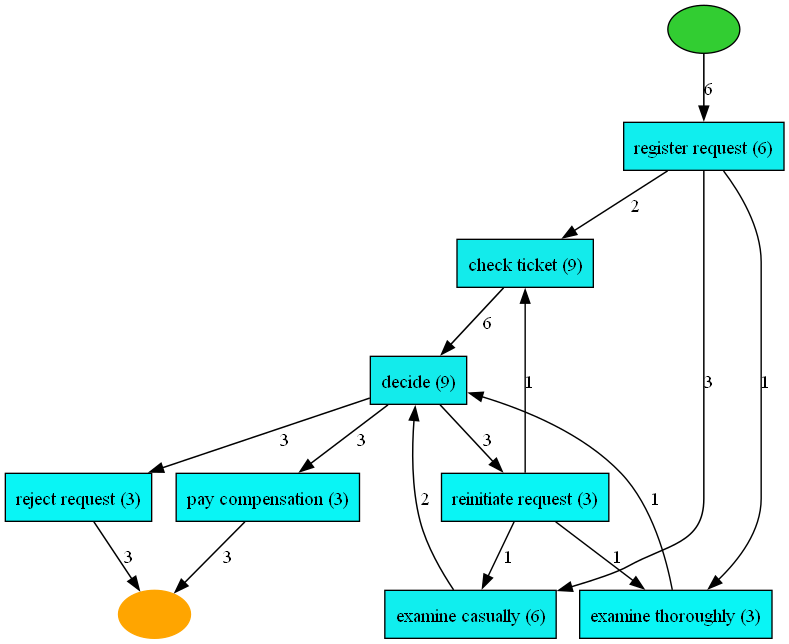

In [3]:
import pm4py

if __name__ == "__main__":
    log = pm4py.read_xes('C:\\Users\\meduarda\\Downloads\\running-example.xes')

    map = pm4py.discover_heuristics_net(log)
    pm4py.view_heuristics_net(map)

In [22]:
import pm4py
import datetime as dt

def import_xes(file_path):
    event_log = pm4py.read_xes(file_path)
    print(event_log)

if __name__ == "__main__":
    import_xes("C:\\Users\\meduarda\\Downloads\\running-example.xes")

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1645.15it/s]

          concept:name            time:timestamp  cost:total org:resource  \
0     register request 2010-12-30 11:02:00+00:00          50         Pete   
1   examine thoroughly 2010-12-31 10:06:00+00:00         400          Sue   
2         check ticket 2011-01-05 15:12:00+00:00         100         Mike   
3               decide 2011-01-06 11:18:00+00:00         200         Sara   
4       reject request 2011-01-07 14:24:00+00:00         200         Pete   
5     register request 2010-12-30 11:32:00+00:00          50         Mike   
6         check ticket 2010-12-30 12:12:00+00:00         100         Mike   
7     examine casually 2010-12-30 14:16:00+00:00         400         Sean   
8               decide 2011-01-05 11:22:00+00:00         200         Sara   
9     pay compensation 2011-01-08 12:05:00+00:00         200        Ellen   
10    register request 2010-12-30 14:32:00+00:00          50         Pete   
11    examine casually 2010-12-30 15:06:00+00:00         400         Mike   